*Research Paper "Analyzing Sleep Health From Lifestyle Data Using Lasso Regression (ICIMTech 2024)*


Import Library

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso

Load Dataset

In [4]:
df=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

print(df)

     Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                

In [7]:
# The permutation_importance function calculates how important each feature is by shuffling the feature values
# and then looking at the degradation in model performance.
# If performance drops significantly after shuffling, the feature is considered important.

def permutation_importance(model, X, y):
  """Calculates permutation importance for a model."""
  importance = np.zeros(X.shape[1])
  for i in range(X.shape[1]):
    X_perm = X.copy()
    np.random.shuffle(X_perm[:, i])  #Shuffle feature values
    scores = cross_val_score(model, X_perm, y, cv=5)
    importance[i] = model.score(X, y) - np.mean(scores)  #Importance measure

  return importance

Select Relevant Features

In [8]:
features = ['Quality of Sleep', 'Age', 'Occupation', 'Stress Level']

In [9]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Encode Categorical Features

In [10]:
encoder = LabelEncoder()
X = df[features].copy()  #Create a copy to avoid modifying original data
X['Occupation'] = encoder.fit_transform(X['Occupation'])  #Encode Occupation column

In [11]:
for col in ['Occupation', 'Stress Level']:
  encoder = LabelEncoder()
  df[col] = encoder.fit_transform(df[col])

Calculate Mean Quality

In [20]:
# age_groups = df.groupby('Age').mean()['Quality of Sleep']
# occupation_groups = df.groupby('Occupation').mean()['Quality of Sleep']
# stress_groups = df.groupby('Stress Level').mean()['Quality of Sleep']

In [17]:
# Create a list of numeric features for calculating the mean
numeric_features = df.select_dtypes(include=['number']).columns

# Calculate the mean for each group considering only numeric features
age_groups = df.groupby('Age')[numeric_features].mean()['Quality of Sleep']
occupation_groups = df.groupby('Occupation')[numeric_features].mean()['Quality of Sleep']
stress_groups = df.groupby('Stress Level')[numeric_features].mean()['Quality of Sleep']

In [24]:
# Convert DataFrame to NumPy arrays for model training
X = X.to_numpy()
y = df['Quality of Sleep'].to_numpy()

In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Train Lasso Regression Model

In [26]:
model = Lasso(alpha=0.01, max_iter=10000)
model.fit(X_train, y_train)


Lasso(alpha=0.01, max_iter=10000)

In [27]:
# Evaluate model performance
score_train = model.score(X_train, y_train)
print("Training score:", score_train)

score_test = model.score(X_test, y_test)
print("Testing score:", score_test)

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation score (mean):", np.mean(scores))

# Interpret results (optional)
coefs = model.coef_
print("Coefficients:", coefs)

# Feature importance from coefficients
coefs = np.abs(model.coef_)
print("Feature importances (absolute coefficients):", coefs)

Training score: 0.9999195550037743
Testing score: 0.9999219516196509
Cross-validation score (mean): 0.9996668460487887
Coefficients: [ 9.77155077e-01  6.93372127e-04 -1.81595642e-03 -9.00410796e-03]
Feature importances (absolute coefficients): [9.77155077e-01 6.93372127e-04 1.81595642e-03 9.00410796e-03]


Visualization

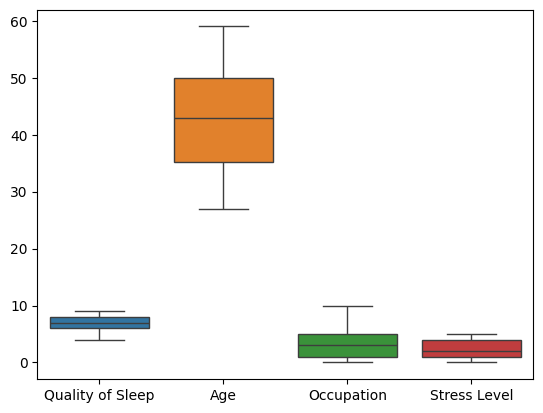

In [29]:
sns.boxplot(data=df[features])
plt.show()

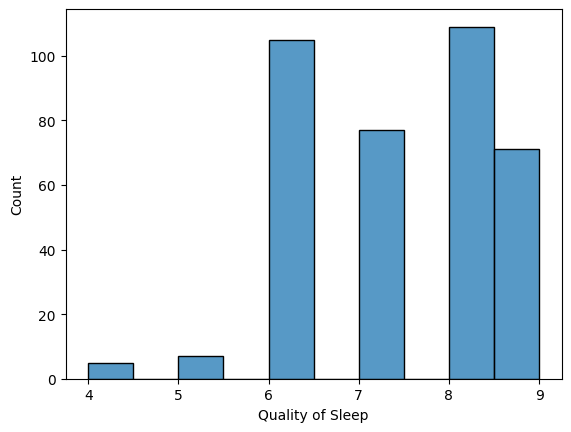

In [30]:
sns.histplot(data=df, x="Quality of Sleep")
plt.show()

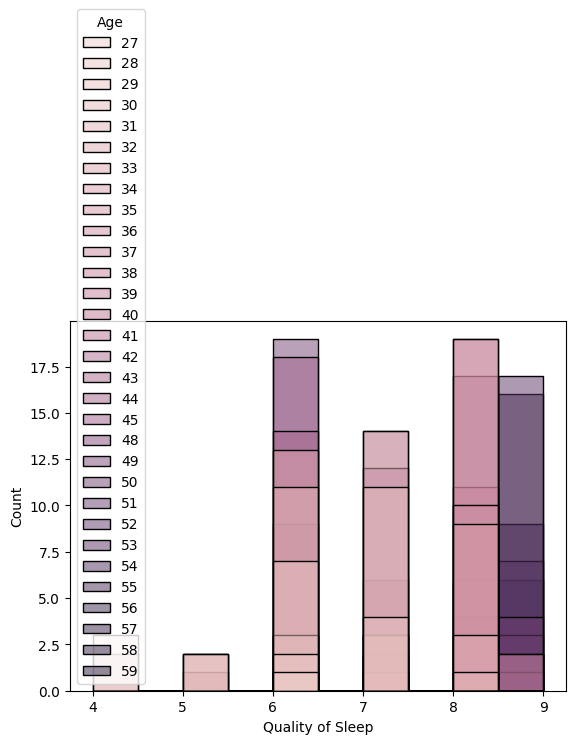

In [31]:
# Distribution plot by Age
sns.histplot(data=df, x="Quality of Sleep", hue="Age")
plt.show()

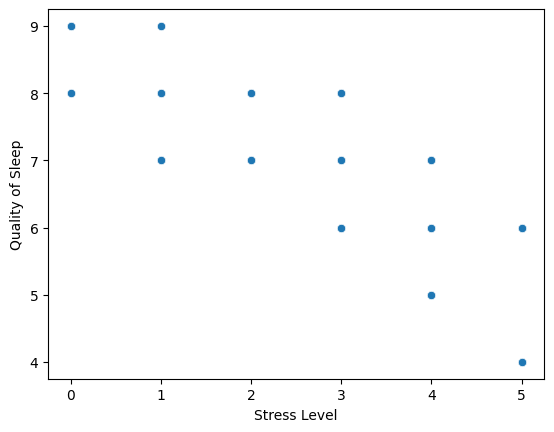

In [39]:
# Relationship between Sleep Quality and Stress Levels
sns.scatterplot(x="Stress Level", y="Quality of Sleep", data=df)
plt.show()

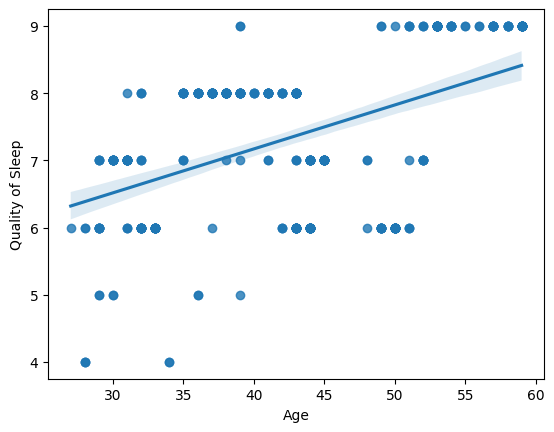

In [40]:
# Relationship between Sleep Quality and Age
sns.regplot(x="Age", y="Quality of Sleep", data=df)
plt.show()

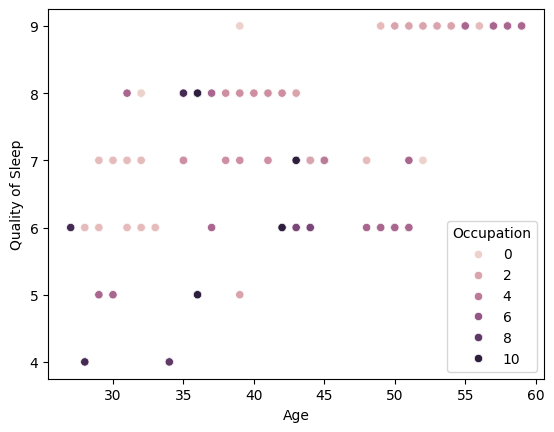

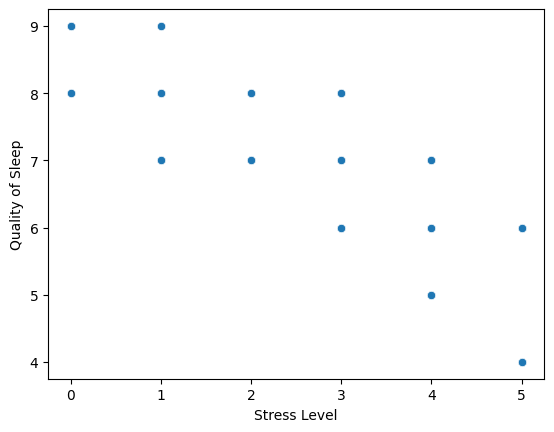

In [43]:
# Create scatter plot
sns.scatterplot(x="Age", y="Quality of Sleep", data=df, hue="Occupation")
plt.show()

sns.scatterplot(x="Stress Level", y="Quality of Sleep", data=df)
plt.show()


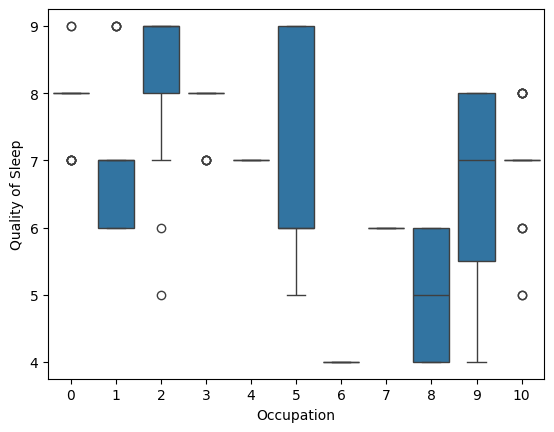

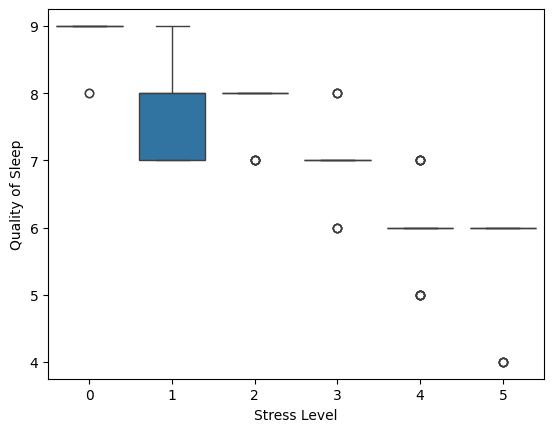

In [44]:
# Create boxplot
sns.boxplot(x="Occupation", y="Quality of Sleep", data=df)
plt.show()

sns.boxplot(x="Stress Level", y="Quality of Sleep", data=df)
plt.show()

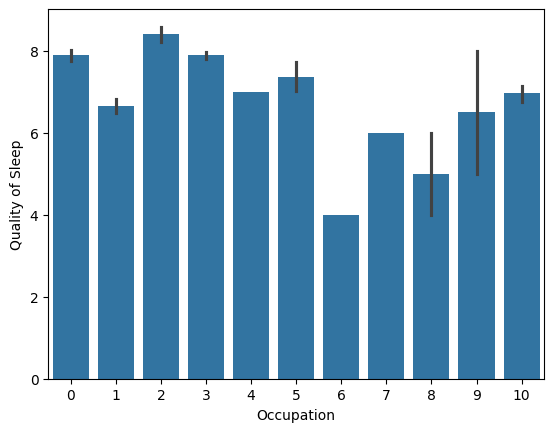

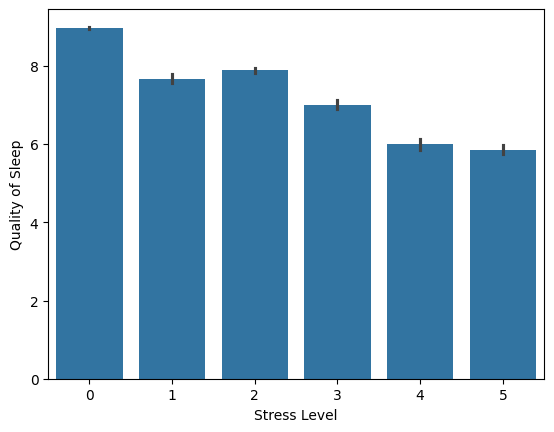

In [46]:
# Create bar chart
sns.barplot(x="Occupation", y="Quality of Sleep", data=df)
plt.show()

sns.barplot(x="Stress Level", y="Quality of Sleep", data=df)
plt.show()

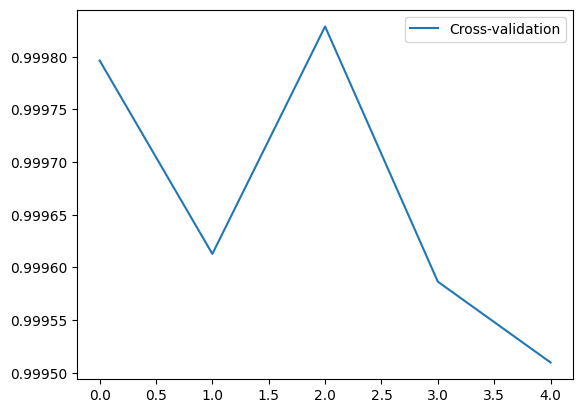

In [36]:
# Learning Curve
sns.lineplot(x=np.arange(len(scores)), y=scores, label="Cross-validation")
plt.show()

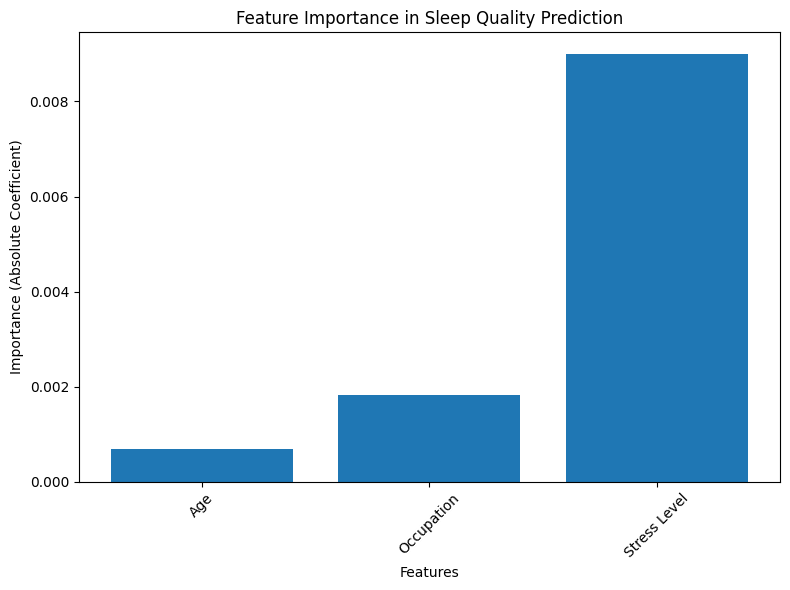

In [37]:
# Feature importances already calculated (absolute coefficients)
coefs = np.abs(model.coef_)

# Prepare data for plotting (assuming feature names are in 'features' list)
feature_names = features[1:]  # Exclude 'Quality of Sleep' (target variable)
importance_values = coefs[1:]  # Exclude first coefficient for target variable

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(feature_names, importance_values)
plt.xlabel("Features")
plt.ylabel("Importance (Absolute Coefficient)")
plt.title("Feature Importance in Sleep Quality Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

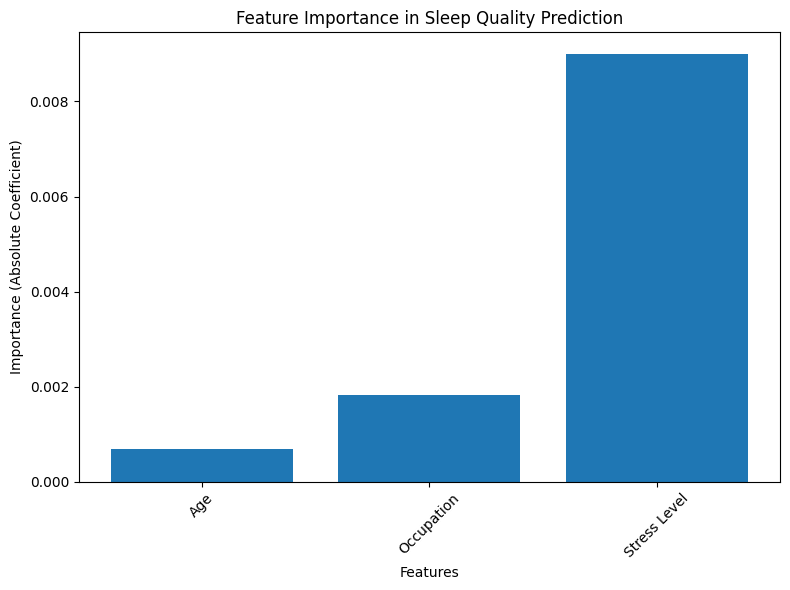

In [38]:

feature_names = ['Quality of Sleep', 'Age', 'Occupation', 'Stress Level']

# Feature importances already calculated (absolute coefficients)
coefs = np.abs(model.coef_)
importance_values = coefs[1:]  # Exclude first coefficient for target variable

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(feature_names[1:], importance_values)  # Exclude 'Quality of Sleep'
plt.xlabel("Features")
plt.ylabel("Importance (Absolute Coefficient)")
plt.title("Feature Importance in Sleep Quality Prediction")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.savefig("feature_importance.png")  # Save plot as PNG